# Panorama application

In [55]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

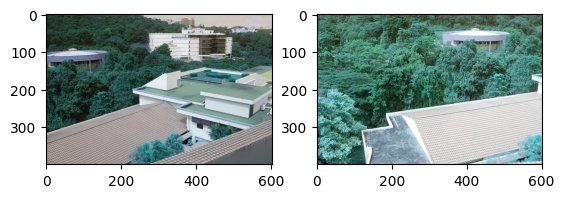

In [56]:
# Load images
image1 = cv2.imread('../../data/panorama_1_1.jpg')
image2 = cv2.imread('../../data/panorama_1_2.jpg')

# To grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

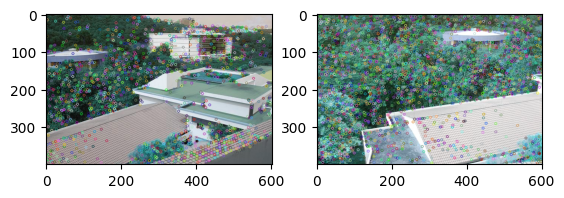

In [57]:

# Create SIFT feature detector
sift = cv2.SIFT_create() 

# Detect and describe features
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Draw keypoints
image1_ = cv2.drawKeypoints(image1, kp1, image1.copy())
image2_ = cv2.drawKeypoints(image2, kp2, image2.copy())

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(image1_)
plt.subplot(1, 2, 2)
plt.imshow(image2_)
plt.show()



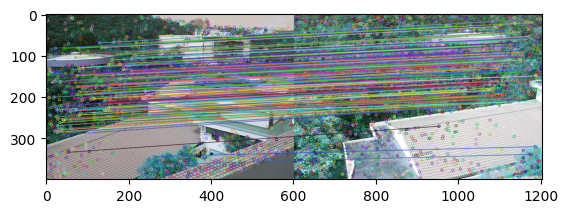

In [58]:
# Create Brute Force Matcher
bf = cv2.BFMatcher()

# Select the top-2 matches of the descriptors
matches = bf.knnMatch(des1, des2, k=2)

# Select good matches
good = []
for m, n in matches:
    if m.distance < 0.50 * n.distance: 
        good.append([m])

# check to see if we should visualize the matched keypoints
matched = cv2.drawMatchesKnn(image1, kp1, image2, kp2, good, None)

# Show image
plt.imshow(matched)
plt.show()

In [59]:
# Initiate points lists for all good matches
pts1 = np.zeros((len(good), 2), dtype="float")
pts2 = np.zeros((len(good), 2), dtype="float")

# Loop over the top matches
for (i, m) in enumerate(good):
    pts1[i] = kp1[m[0].queryIdx].pt
    pts2[i] = kp2[m[0].trainIdx].pt
    
# Compute the transformation matrix between the two images based on the matches
H, masked = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Print the transformation matrix
print("\nHomography matrix:")
print(H)


Homography matrix:
[[ 6.65213296e-01 -6.65360582e-02  3.66557087e+02]
 [ 1.96450031e-02  9.58687255e-01 -5.26036281e+01]
 [-5.95135405e-04  1.09716032e-04  1.00000000e+00]]


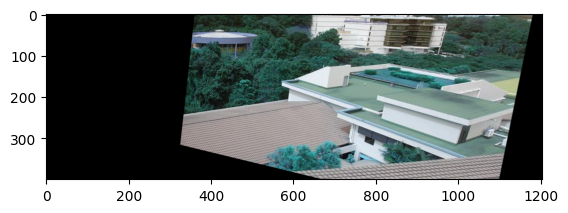

In [64]:
# Transform image one to align with image two using the transformation matrix
dst = cv2.warpPerspective(image1, H, ((image1.shape[1] + image2.shape[1]), image2.shape[0]))  # Warped image

# Show image
plt.imshow(dst)
plt.show()

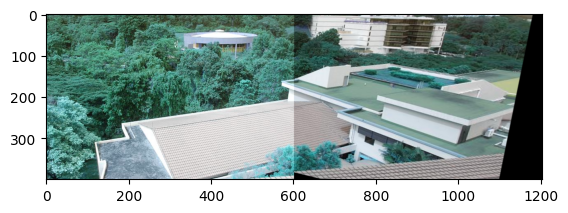

In [66]:
# Add image two to the previous created frame to obtain the stiched image
dst[0:img2.shape[0], 0:img2.shape[1]] = image2 

# Show image
plt.imshow(dst)
plt.show()